# AIAP week9, RL  


# V-Values and RPE


We use the same environment shown on the slides study two important quantities:
* the Reward Prediction Error (RPE)
* the V-value, V(s), aka state-value.

<hr>

### V(s), informal definition.
With each state s, we can associate a quantity V(s). The V-value V(s) tells us the following: when the agent starts in state s and follows a (fixed) policy, how much reward will the agent collect, on average, until the end of the episode?

In this exercise you use the policy-evaluation algorithm to estimate the V-values for a given policy.


# Specification of the task
Reward and Transitions.

In [49]:
# unchanged from prev. exercise.
rewards = [0, -1, 0, -10, 4, 3, 7, 5]
is_terminal = [False, False, False, True, False, True, True, True]
T = [ 
    [1, 2],  # in state s0, taking action a0 brings us to state s1, a1 to s2
    [3,4],   # in state s1, taking action a0 brings us to state s3, a1 to s4
    [6,5],   # in state s2, taking action a0 brings us to state s6, a1 to s5
    [-1, -1], # state s3 is a terminal state. next-state is undefined (we use -1 here).
    [7, 7],   # from state s4, both actions lead to state s7
    [-1, -1], # state s5 is a terminal state
    [-1, -1], # state s6 is a terminal state
    [-1, -1]  # state s7 is a terminal state
]


# Exercise:


### Implement the Policy Evaluation Algorithm
* Consider the **random policy** (actions are selected with equal probability 0.5).
* Approximate the V(s) for every state s using the Policy Evaluation Algorithm
* Monitor V(s) and the trial-by-trial RPE per state s, over time.
* Use matplotlib to visualize per state the evolution of a) the value and b) the RPE

### some remarks

Look at the following variables. V is a list of state values $V(s)$. The list is initized with 0s, and after applying policy evaluation, we expect V to converge to the correct V(s), e.g. we expect $V[0] \approx 1.75$, $V[1] \approx -0.5$, and so on.  
Note: The value of terminal states is defined as $V(S_{terminal})$ = 0.

In addition to the final value V(s), it is interesting to study the evolution of V(s), that is, how the value evolve from the initial 0 to the final value. In order to monitor this evolution, we define an additional variable V_t. It is a list of lists. For each state, we keep track of the sequence of values. For example, the list at V[0] is a list that looks like this: $[0, 0.01, 0.02, ...  1.75]$.

A key learning signal in RL is the Reward Prediction Error RPE. We also monitor this quantity, at each state, over the entire learning process. To this end, we use the same data structure as we did for V_t.



In [50]:
# imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

[[], [-0.5, -0.4, 0.1, 0.05], [], [], [], [], [0.3], []]


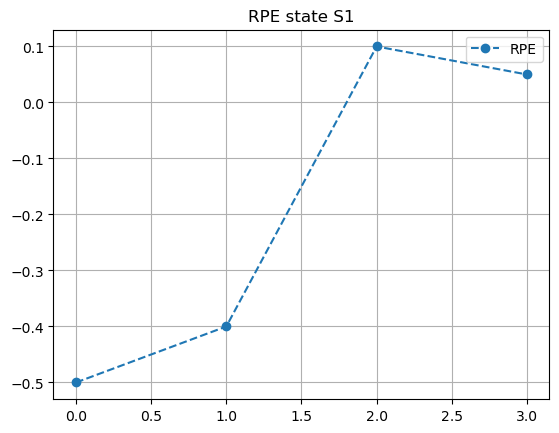

In [51]:
# short demo how to use lists and how to append values to lists

# note: this implementation uses python without any extra libraries. You may find it simpler to use numpy arrays.

demo = [[],[],[],[],[],[],[],[]]

RPE = -0.5 
demo[1].append(RPE)
RPE = +0.3
demo[6].append(RPE)
demo[1].append(-0.4)
demo[1].append(+0.1)
demo[1].append(+0.05)

print(demo)

# plot
state = 1
plt.plot(demo[state], '--o', label='RPE')
plt.title('RPE state S{}'.format(state))
plt.grid()
plt.legend()


Simple demo that shows how to use these variables:

In [52]:

# Access by (zero-based) index:
print('reward of state s4:')
r = rewards[4]
print(r)

# store the stateID in a variable. Use .format() for string-interpolation
stateID = 5
r = rewards[stateID]
print('At state {} the agent obtains a reward r = {}'.format(stateID, r))

print('\nUse a for-loop to iterate over all indices:')
for i in range(len(rewards)):
    # In Python, indentation is important! All indented lines belong to the body of the for loop
    print('At state s{} you obtain a reward of {}'.format(i, rewards[i]))
    # this line is still inside the loop
# this line is outside the loop



reward of state s4:
4
At state 5 the agent obtains a reward r = 3

Use a for-loop to iterate over all indices:
At state s0 you obtain a reward of 0
At state s1 you obtain a reward of -1
At state s2 you obtain a reward of 0
At state s3 you obtain a reward of -10
At state s4 you obtain a reward of 4
At state s5 you obtain a reward of 3
At state s6 you obtain a reward of 7
At state s7 you obtain a reward of 5


To get started:
- look at the Policy Evaluation Algorithm on the slides
- Start by implementing a loop that rolls-out one episode: Start at state S0, take actions until you reach a terminal state 
- If that works, implement the TD(0) update rule (see slides / pseudocode): calculate the RPE and update V(s) += alpha*RPE
- wrap everything with an outer loop and run thousands of episodes. Learn the state-values and collect the quantities for monitoring. Finally plot.



In [53]:
# The (current) value for each state
V = [0, 0 , 0, 0, 0, 0, 0, 0]

# The value at each state AND each time-step
V_t = [[0],[0],[0],[0],[0],[0],[0],[0]] # initialize with 0

# The trial-by-trial RPE, for each state (the state s, not s')
RPE_t = [[],[],[],[],[],[],[],[]]  # .append also works for empty lists 

# try different learning rates
alpha = 0.01

# ignore for now (it's the discount factor)
gamma = 1

In [54]:
# code example how to choose action a0 or a1 randomly:
import random

for _ in range(20): # by convention, _ simply tells: we are not interested in this value  
    # this line implements the random policy:
    action = random.randint(0,1)  
    print(action, end=" ") # end=" " replaces the defalt "newline" with space.

1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 

In [55]:
n_episodes = 10000
sum_R = 0

for e in range(n_episodes):
    current_state = 0

    while (not is_terminal[current_state]):
        next_state = T[current_state][random.randint(0,1)]
        r = rewards[next_state]

        rpe = r + gamma * V[next_state] - V[current_state]
        V[current_state] += alpha * rpe

        V_t[current_state].append(V[current_state])
        RPE_t[current_state].append(rpe)

        current_state = next_state
        sum_R += r
        
print('Done')
print('Sum of all rewards sum_R: {}'.format(sum_R))
print('Avg reward = {}'.format(sum_R/n_episodes))
print('V(s) = {}'.format(V))

Done
Sum of all rewards sum_R: 18606
Avg reward = 1.8606
V(s) = [1.7009191324282154, -1.011863254742472, 5.292312940215476, 0, 4.999999999950916, 0, 0, 0]


In [56]:
def plt_V_RPE(state, V_values, RPE_values):
    plt.plot(V_values[state], label='V(S{})'.format(state))
    plt.plot(RPE_values[state], '.', label='RPE')
    plt.title('RPE and V at state S{}'.format(state))
    plt.legend()
    plt.grid()

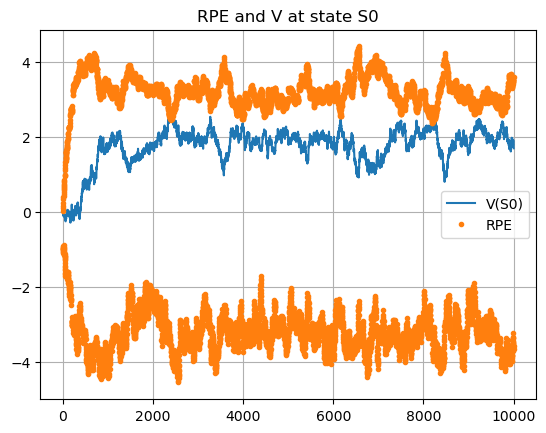

In [57]:
plt_V_RPE(0, V_t, RPE_t)

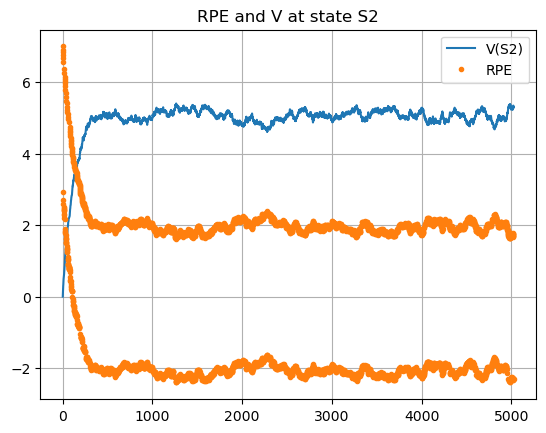

In [58]:
plt_V_RPE(2, V_t, RPE_t)

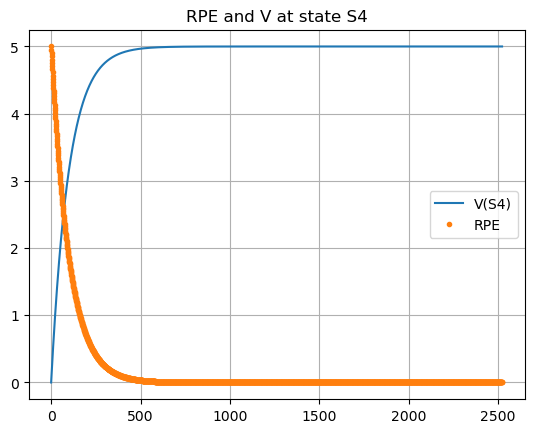

In [59]:
plt_V_RPE(4, V_t, RPE_t)